<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 2

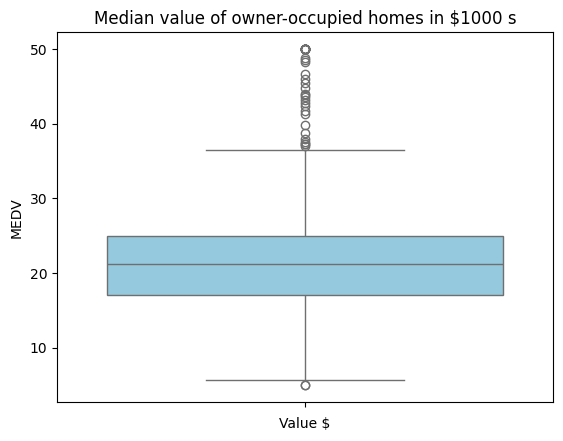

In [8]:
# Create the box plot
sns.boxplot(data=boston_df['MEDV'], color='skyblue')

pyplot.title('Median value of owner-occupied homes in $1000 s')
pyplot.xlabel('Value $')

# Show the plot
pyplot.show()

<ipython-input-13-0b206ff7b3df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CHAS', data=boston_df, palette='viridis')


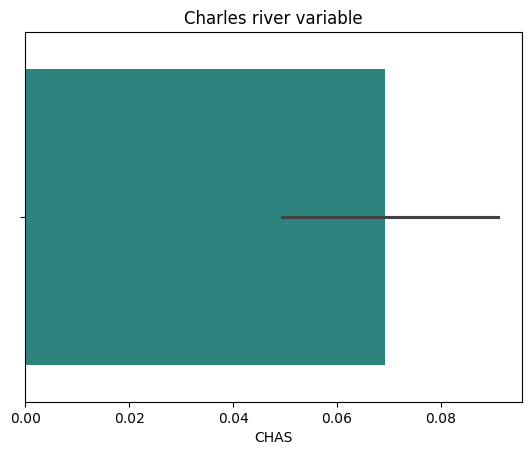

In [13]:
sns.barplot(x='CHAS', data=boston_df, palette='viridis')

# Add title and axis labels
pyplot.title('Charles river variable')

# Display the plot
pyplot.show()

<ipython-input-17-61f2e1694f3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='coolwarm')


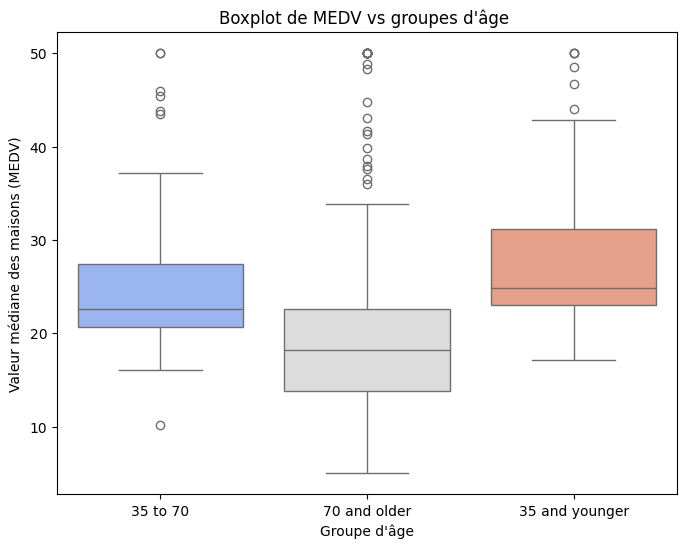

In [17]:
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(lambda x: '35 and younger' if x <= 35 
                                             else ('35 to 70' if x <= 70 else '70 and older'))

# Tracer la boxplot
pyplot.figure(figsize=(8,6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='coolwarm')
pyplot.title('Boxplot de MEDV vs groupes d\'âge ')
pyplot.xlabel('Groupe d\'âge')
pyplot.ylabel('Valeur médiane des maisons (MEDV)')
pyplot.show()

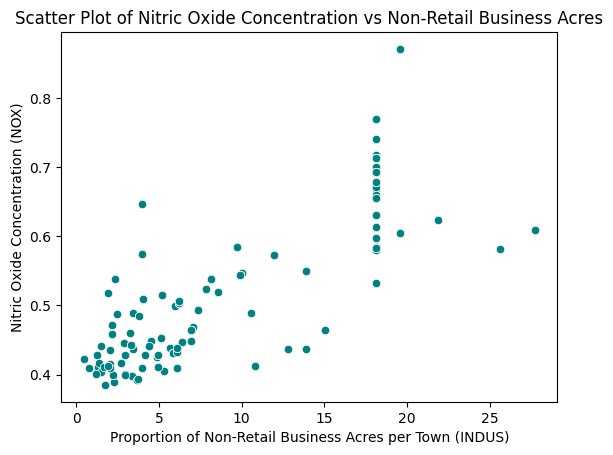

In [19]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='teal')

pyplot.title('Scatter Plot of Nitric Oxide Concentration vs Non-Retail Business Acres')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxide Concentration (NOX)')
pyplot.show()

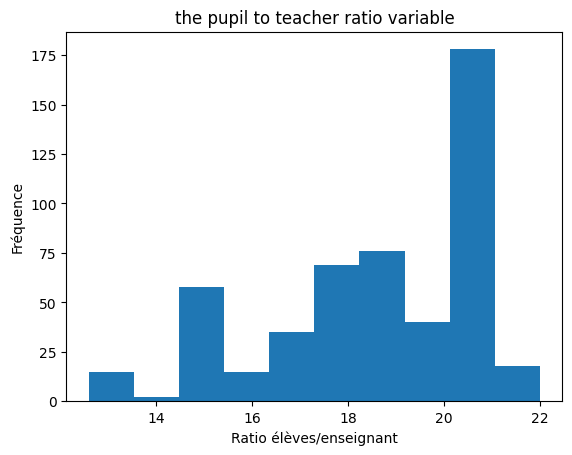

In [21]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('the pupil to teacher ratio variable')
pyplot.xlabel('Ratio élèves/enseignant')
pyplot.ylabel('Fréquence')
pyplot.show()

# Task 3

In [ ]:
the hypotheses are:
H0 : the mean of houses bounded is equal to the mean of houses not bounded by the Charles River are equal
H1 : the mean of Houses bounded is not equal to the mean of houses not bounded by the Charles River

In [24]:
from scipy.stats import ttest_ind
group_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(group_bounded, group_not_bounded, equal_var=False)
print(t_stat, p_value)

3.113291312794837 0.003567170098137517


In [ ]:
we reject H0
There is significant evidence at the 5% level to conclude that the median value of houses differs significantly depending on whether they are bounded by the Charles River or not.

In [ ]:
H0 : All group means of MEDV are equal (no difference in median house values across AGE groups)
H1 : there is a difference in median house values across AGE groups

In [30]:
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(lambda x: 'Young' if x <= 35 else ('Middle-aged' if x <= 70 else 'Old'))

X = pd.get_dummies(boston_df['AGE_GROUP'], drop_first=True)  # évite la colinéarité
y = boston_df['MEDV']

# Ajouter la constante pour le modèle
X = sm.add_constant(X)

# Construire le modèle OLS
model = sm.OLS(y,X).fit()
predictions = model.predict()
# Afficher le résumé
model.summary()

<class 'ValueError'>: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
H0 : There is no linear correlation between NOX and INDUS 
H1 : There is a linear correlation between NOX and INDUS

In [32]:
X = boston_df['INDUS']
y = boston_df['NOX']

# Ajouter constante (intercept)
X = sm.add_constant(X)

# Ajuster modèle
model = sm.OLS(y, X).fit()

# Résumé
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           7.91e-98
Time:                        01:07:07   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Since 𝑝<0.05, we reject H0 
we conclude there is a significant positive correlation between Nitric oxide concentrations and proportion of non-retail business acres.

In [ ]:
Null Hypothesis H0 : There is no effect of the weighted distance (DIS) on the median value of homes (MEDV). 
Alternative Hypothesis H1 : There is a significant effect of DIS on MEDV.

In [33]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant to the predictor (intercept term)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        01:10:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Since p-value is very small (p< 0.05), this effect is statistically significant.